In [25]:
# Satellite Sizing Tool
# Starting with total mass allowable and sizing various subsystems

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import Tuple, Dict, List
import math

# Set up plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

print("Satellite Sizing Tool Initialized")
print("Note: This notebook requires antenna_sizing.ipynb to be executed first")

Satellite Sizing Tool Initialized
Note: This notebook requires antenna_sizing.ipynb to be executed first


In [26]:
# Import Antenna Sizing Components
# This cell imports the comprehensive antenna sizing functions from antenna_sizing.ipynb
# You must run antenna_sizing.ipynb first to define these classes and functions

# Physical constants (in case not defined)
try:
    SPEED_OF_LIGHT
except NameError:
    SPEED_OF_LIGHT = 299792458  # m/s
    EARTH_RADIUS = 6371000  # meters
    BOLTZMANN_CONSTANT = 1.38e-23  # J/K

# Import the antenna sizing classes and functions
# These should be available if antenna_sizing.ipynb has been executed

print("Checking for antenna sizing components...")

required_components = [
    'OrbitalParameters', 
    'CommunicationRequirements', 
    'LinkBudgetCalculator',
    'PhasedArrayAntenna', 
    'ThermalAnalysis',
    'size_antenna_for_satellite'
]

missing_components = []
for component in required_components:
    try:
        eval(component)
        print(f"✓ {component} available")
    except NameError:
        missing_components.append(component)
        print(f"✗ {component} not found")

if missing_components:
    print(f"\n⚠ Missing components: {missing_components}")
    print("Please run antenna_sizing.ipynb first to define these classes")
    print("Then restart and run this notebook")
else:
    print("\n✓ All antenna sizing components available!")
    print("Ready to use comprehensive antenna calculations")

Checking for antenna sizing components...
✗ OrbitalParameters not found
✗ CommunicationRequirements not found
✗ LinkBudgetCalculator not found
✗ PhasedArrayAntenna not found
✗ ThermalAnalysis not found
✗ size_antenna_for_satellite not found

⚠ Missing components: ['OrbitalParameters', 'CommunicationRequirements', 'LinkBudgetCalculator', 'PhasedArrayAntenna', 'ThermalAnalysis', 'size_antenna_for_satellite']
Please run antenna_sizing.ipynb first to define these classes
Then restart and run this notebook


In [27]:
@dataclass
class GPUParameters:
    """Parameters for GPU units"""
    mass: float  # kg per GPU
    support_hardware_mass_multiplier: float  # multiplier for support hardware mass
    power_consumption: float  # Watts per GPU at full power
    waste_heat_fraction: float  # fraction of power that becomes waste heat
    downclocking_coefficient: float  # power reduction factor when downclocked (0-1)
    
    def get_actual_power(self, downclocked: bool = False) -> float:
        """Get actual power consumption, optionally downclocked"""
        if downclocked:
            return self.power_consumption * self.downclocking_coefficient
        return self.power_consumption
    
    def get_waste_heat(self, downclocked: bool = False) -> float:
        """Get waste heat production"""
        return self.get_actual_power(downclocked) * self.waste_heat_fraction

# Example GPU parameters (based on typical space-qualified computing units)
gpu_params = GPUParameters(
    mass=2.5,  # kg per GPU unit
    support_hardware_mass_multiplier=1.8,  # support hardware adds 80% to GPU mass
    power_consumption=75,  # Watts per GPU
    waste_heat_fraction=0.85,  # 85% of power becomes waste heat
    downclocking_coefficient=0.6  # 40% power reduction when downclocked
)

print("GPU Parameters:")
print(f"Mass per unit: {gpu_params.mass} kg")
print(f"Power consumption: {gpu_params.power_consumption} W")
print(f"Power when downclocked: {gpu_params.get_actual_power(True)} W")
print(f"Waste heat at full power: {gpu_params.get_waste_heat(False)} W")
print(f"Waste heat when downclocked: {gpu_params.get_waste_heat(True)} W")

GPU Parameters:
Mass per unit: 2.5 kg
Power consumption: 150 W
Power when downclocked: 90.0 W
Waste heat at full power: 127.5 W
Waste heat when downclocked: 76.5 W


In [28]:
# Antenna System Wrapper
# This uses the comprehensive antenna sizing functions from antenna_sizing.ipynb

@dataclass 
class AntennaSystem:
    """Antenna system wrapper that uses comprehensive antenna sizing calculations"""
    altitude_km: float = 600  # Orbital altitude
    downlink_data_rate_mbps: float = 100  # Required downlink data rate
    uplink_data_rate_mbps: float = 1000  # Required uplink data rate
    frequency_ghz: float = 26.5  # Operating frequency (Ka-band)
    antenna_gain_db: float = 35.0  # Antenna gain
    
    def __post_init__(self):
        # Use the comprehensive antenna sizing function
        self._calculate_antenna_parameters()
    
    def _calculate_antenna_parameters(self):
        """Calculate antenna parameters using comprehensive antenna sizing"""
        try:
            # Use the comprehensive antenna sizing function from antenna_sizing.ipynb
            sizing_result = size_antenna_for_satellite(
                altitude_km=self.altitude_km,
                downlink_data_rate_mbps=self.downlink_data_rate_mbps,
                uplink_data_rate_mbps=self.uplink_data_rate_mbps,
                frequency_ghz=self.frequency_ghz,
                antenna_gain_db=self.antenna_gain_db
            )
            
            # Extract results from comprehensive calculation
            self.antenna_mass = sizing_result['mass_kg']
            self.power_rx_w = sizing_result['power_rx_w']
            self.power_tx_w = sizing_result['power_tx_w']
            self.waste_heat_peak_w = sizing_result['waste_heat_w']
            self.required_eirp_w = sizing_result['eirp_w']
            self.total_elements = sizing_result['num_elements']
            self.aperture_area_m2 = sizing_result['aperture_area_m2']
            
            print(f"Antenna system sized using comprehensive calculations:")
            print(f"  Altitude: {self.altitude_km} km")
            print(f"  Data rate: {self.downlink_data_rate_mbps} Mbps")
            print(f"  Frequency: {self.frequency_ghz} GHz")
            print(f"  EIRP: {self.required_eirp_w:.1f} W")
            print(f"  Elements: {self.total_elements}")
            print(f"  Mass: {self.antenna_mass:.2f} kg")
            
        except NameError as e:
            print(f"Error: Antenna sizing functions not available: {e}")
            print("Please run antenna_sizing.ipynb first")
            # Set default values to prevent crashes
            self.antenna_mass = 460.0  # kg - placeholder
            self.power_rx_w = 5000.0  # W - placeholder
            self.power_tx_w = 12000.0  # W - placeholder  
            self.waste_heat_peak_w = 400.0  # W - placeholder
            self.required_eirp_w = 100.0  # W - placeholder
            self.total_elements = 1521  # placeholder
            self.aperture_area_m2 = 1.0  # m² - placeholder
            
        except Exception as e:
            print(f"Error in antenna sizing: {e}")
            # Fallback to conservative estimates
            self.antenna_mass = 75.0
            self.power_rx_w = 4500.0
            self.power_tx_w = 9000.0
            self.waste_heat_peak_w = 9000.0
            self.required_eirp_w = 150.0
            self.total_elements = 1500
            self.aperture_area_m2 = 1.5
    
    def get_mass(self) -> float:
        """Get total antenna mass"""
        return self.antenna_mass
    
    def get_power(self) -> float:
        """Get antenna power consumption (receive mode)"""
        return self.power_rx_w
    
    def get_waste_heat(self) -> float:
        """Get peak waste heat generation"""
        return self.waste_heat_peak_w
    
    def update_parameters(self, **kwargs):
        """Update antenna parameters and recalculate"""
        for key, value in kwargs.items():
            if hasattr(self, key):
                setattr(self, key, value)
        self._calculate_antenna_parameters()

# Create example antenna system for LEO satellite
print("Creating antenna system...")
antenna = AntennaSystem(
    altitude_km=600,
    downlink_data_rate_mbps=1000,
    frequency_ghz=26.5,  # Ka-band
    antenna_gain_db=35.0
)

print(f"\nAntenna System Summary:")
print(f"Mass: {antenna.get_mass():.2f} kg")
print(f"Power (RX mode): {antenna.get_power():.1f} W")
print(f"Power (TX mode): {antenna.power_tx_w:.1f} W")
print(f"Peak waste heat: {antenna.get_waste_heat():.1f} W")
print(f"Aperture area: {antenna.aperture_area_m2:.3f} m²")

Creating antenna system...
Error: Antenna sizing functions not available: name 'size_antenna_for_satellite' is not defined
Please run antenna_sizing.ipynb first

Antenna System Summary:
Mass: 50.00 kg
Power (RX mode): 100.0 W
Power (TX mode): 500.0 W
Peak waste heat: 400.0 W
Aperture area: 1.000 m²


In [29]:
@dataclass
class Radiator:
    """Radiator sizing based on waste heat rejection requirements"""
    emissivity: float = 0.85  # Surface emissivity (typical 0.8-0.9 for space radiators)
    stefan_boltzmann: float = 5.67e-8  # Stefan-Boltzmann constant W/m²/K⁴
    operating_temp: float = 300  # Operating temperature in Kelvin
    background_temp: float = 4  # Space background temperature in Kelvin
    mass_per_area: float = 5.0  # kg/m² (typical for space radiator panels)
    
    def calculate_area(self, waste_heat_watts: float) -> float:
        """Calculate required radiator area for given waste heat"""
        # Q = ε * σ * A * (T⁴ - T_bg⁴)
        temp_factor = self.operating_temp**4 - self.background_temp**4
        area = waste_heat_watts / (self.emissivity * self.stefan_boltzmann * temp_factor)
        return area
    
    def get_mass(self, waste_heat_watts: float) -> float:
        """Get radiator mass for given waste heat"""
        area = self.calculate_area(waste_heat_watts)
        return area * self.mass_per_area

# Example radiator
radiator = Radiator(
    operating_temp=320,  # 47°C operating temperature
    mass_per_area=4.5  # Lightweight radiator design
)

# Test with example waste heat
test_waste_heat = 500  # Watts
print("Radiator Sizing:")
print(f"Operating temperature: {radiator.operating_temp:.0f} K ({radiator.operating_temp-273:.0f}°C)")
print(f"For {test_waste_heat} W waste heat:")
print(f"Required radiator area: {radiator.calculate_area(test_waste_heat):.2f} m²")
print(f"Radiator mass: {radiator.get_mass(test_waste_heat):.2f} kg")

Radiator Sizing:
Operating temperature: 320 K (47°C)
For 500 W waste heat:
Required radiator area: 0.99 m²
Radiator mass: 4.45 kg


In [30]:
@dataclass
class SolarPanels:
    """Solar panel sizing based on power requirements"""
    efficiency: float = 0.30  # Solar cell efficiency (high-efficiency space cells)
    solar_constant: float = 1361  # Solar constant in W/m² at 1 AU
    degradation_factor: float = 0.85  # Degradation over mission life
    packing_factor: float = 0.90  # Area utilization factor
    mass_per_area: float = 3.5  # kg/m² (including structure)
    power_margin: float = 1.3  # 30% power margin
    
    def calculate_area_per_panel(self, power_watts: float) -> float:
        """Calculate solar panel area required for given power"""
        effective_irradiance = (self.solar_constant * self.efficiency * 
                              self.degradation_factor * self.packing_factor)
        required_power = power_watts * self.power_margin
        return required_power / effective_irradiance
    
    def get_mass_per_panel(self, power_watts: float) -> float:
        """Get mass of one solar panel for given power"""
        area = self.calculate_area_per_panel(power_watts)
        return area * self.mass_per_area
    
    def get_total_mass(self, power_watts: float, num_panels: int = 2) -> float:
        """Get total mass of solar panel system"""
        return self.get_mass_per_panel(power_watts) * num_panels

# Example solar panels
solar_panels = SolarPanels(
    efficiency=0.32,  # High-efficiency triple junction cells
    mass_per_area=3.2  # Lightweight design
)

# Test with example power requirement
test_power = 400  # Watts
print("Solar Panel Sizing:")
print(f"Solar cell efficiency: {solar_panels.efficiency*100:.0f}%")
print(f"For {test_power} W power requirement:")
print(f"Area per panel: {solar_panels.calculate_area_per_panel(test_power):.2f} m²")
print(f"Mass per panel: {solar_panels.get_mass_per_panel(test_power):.2f} kg")
print(f"Total mass (2 panels): {solar_panels.get_total_mass(test_power, 2):.2f} kg")

Solar Panel Sizing:
Solar cell efficiency: 32%
For 400 W power requirement:
Area per panel: 1.56 m²
Mass per panel: 4.99 kg
Total mass (2 panels): 9.99 kg


In [31]:
class SatelliteSizer:
    """Main satellite sizing class that integrates all subsystems"""
    
    def __init__(self, total_mass_budget: float, gpu_params: GPUParameters, 
                 antenna: AntennaSystem, radiator: Radiator, 
                 solar_panels: SolarPanels):
        self.total_mass_budget = total_mass_budget
        self.gpu_params = gpu_params
        self.antenna = antenna
        self.radiator = radiator
        self.solar_panels = solar_panels
        
        # Structure and other subsystems mass fraction
        self.structure_mass_fraction = 0.25  # 25% for structure, ADCS, etc.
        
    def size_satellite(self, num_gpus: int, downclocked: bool = False) -> Dict:
        """Size the satellite for given number of GPUs"""
        results = {}
        
        # GPU payload sizing
        gpu_mass = num_gpus * self.gpu_params.mass
        support_mass = gpu_mass * (self.gpu_params.support_hardware_mass_multiplier - 1)
        payload_mass = gpu_mass + support_mass
        
        # Power calculations
        gpu_power = num_gpus * self.gpu_params.get_actual_power(downclocked)
        gpu_waste_heat = num_gpus * self.gpu_params.get_waste_heat(downclocked)
        
        # Antenna (fixed) - using new antenna system
        antenna_mass = self.antenna.get_mass()
        antenna_power = self.antenna.get_power()
        antenna_waste_heat = self.antenna.get_waste_heat()
        
        # Total power requirement
        total_power = gpu_power + antenna_power
        
        # Total waste heat (GPU + antenna)
        total_waste_heat = gpu_waste_heat + antenna_waste_heat
        
        # Radiator sizing (based on total waste heat)
        radiator_mass = self.radiator.get_mass(total_waste_heat)
        
        # Solar panel sizing (for total power)
        solar_mass = self.solar_panels.get_total_mass(total_power, num_panels=2)
        
        # Structure mass (percentage of total)
        subsystem_mass = payload_mass + antenna_mass + radiator_mass + solar_mass
        structure_mass = subsystem_mass * self.structure_mass_fraction / (1 - self.structure_mass_fraction)
        
        # Total satellite mass
        total_mass = subsystem_mass + structure_mass
        
        # Store results
        results = {
            'num_gpus': num_gpus,
            'downclocked': downclocked,
            'masses': {
                'payload_gpus': gpu_mass,
                'payload_support': support_mass,
                'payload_total': payload_mass,
                'antenna': antenna_mass,
                'radiator': radiator_mass,
                'solar_panels': solar_mass,
                'structure': structure_mass,
                'total': total_mass
            },
            'power': {
                'gpus': gpu_power,
                'antenna': antenna_power,
                'total': total_power,
                'waste_heat_gpu': gpu_waste_heat,
                'waste_heat_antenna': antenna_waste_heat,
                'waste_heat_total': total_waste_heat
            },
            'within_budget': total_mass <= self.total_mass_budget,
            'mass_margin': self.total_mass_budget - total_mass
        }
        
        return results
    
    def find_max_gpus(self, downclocked: bool = False) -> Tuple[int, Dict]:
        """Find maximum number of GPUs that fit within mass budget"""
        max_gpus = 0
        best_result = None
        
        # Binary search approach for efficiency
        low, high = 1, 5000  # reasonable bounds
        
        while low <= high:
            mid = (low + high) // 2
            result = self.size_satellite(mid, downclocked)
            
            if result['within_budget']:
                max_gpus = mid
                best_result = result
                low = mid + 1
            else:
                high = mid - 1
        
        return max_gpus, best_result

In [32]:
# Example satellite sizing
# Define your mission parameters here
TOTAL_MASS_BUDGET = 12000  # kg total satellite mass budget

# Create satellite sizer
sizer = SatelliteSizer(
    total_mass_budget=TOTAL_MASS_BUDGET,
    gpu_params=gpu_params,
    antenna=antenna,
    radiator=radiator,
    solar_panels=solar_panels
)

print(f"Satellite Sizing Analysis")
print(f"Total Mass Budget: {TOTAL_MASS_BUDGET} kg")
print("="*50)

# Find maximum GPUs for both modes
max_gpus_full, result_full = sizer.find_max_gpus(downclocked=False)
max_gpus_down, result_down = sizer.find_max_gpus(downclocked=True)

print(f"\nMaximum GPUs (full power): {max_gpus_full}")
print(f"Maximum GPUs (downclocked): {max_gpus_down}")

# Detailed analysis for full power mode
print(f"\n--- Full Power Mode Analysis ({max_gpus_full} GPUs) ---")
if result_full:
    masses = result_full['masses']
    power = result_full['power']
    
    print(f"Mass Breakdown:")
    print(f"  GPU payload: {masses['payload_gpus']:.1f} kg")
    print(f"  Support hardware: {masses['payload_support']:.1f} kg")
    print(f"  Antenna: {masses['antenna']:.1f} kg")
    print(f"  Radiator: {masses['radiator']:.1f} kg")
    print(f"  Solar panels: {masses['solar_panels']:.1f} kg")
    print(f"  Structure: {masses['structure']:.1f} kg")
    print(f"  Total: {masses['total']:.1f} kg")
    print(f"  Mass margin: {result_full['mass_margin']:.1f} kg")

    print(f" Solar panel area: {masses['solar_panels'] / solar_panels.mass_per_area:.1f} m²")
    print(f" Radiator area: {masses['radiator'] / radiator.mass_per_area:.1f} m²")
    
    print(f"\nPower Breakdown:")
    print(f"  GPU power: {power['gpus']:.1f} W")
    print(f"  Antenna power: {power['antenna']:.1f} W")
    print(f"  Total power: {power['total']:.1f} W")
    
    print(f"\nWaste Heat Breakdown:")
    print(f"  GPU waste heat: {power['waste_heat_gpu']:.1f} W")
    print(f"  Antenna waste heat: {power['waste_heat_antenna']:.1f} W")
    print(f"  Total waste heat: {power['waste_heat_total']:.1f} W")

print(f"\n--- Antenna System Details ---")
print(f"Altitude: {antenna.altitude_km} km")
print(f"Data rate: {antenna.downlink_data_rate_mbps} Mbps")
print(f"Frequency: {antenna.frequency_ghz} GHz")
print(f"Required EIRP: {antenna.required_eirp_w:.1f} W")
print(f"Number of elements: {antenna.total_elements}")
print(f"TX power: {antenna.power_tx_w:.1f} W")

Satellite Sizing Analysis
Total Mass Budget: 5000 kg

Maximum GPUs (full power): 393
Maximum GPUs (downclocked): 497

--- Full Power Mode Analysis (393 GPUs) ---
Mass Breakdown:
  GPU payload: 982.5 kg
  Support hardware: 786.0 kg
  Antenna: 50.0 kg
  Radiator: 449.7 kg
  Solar panels: 1474.6 kg
  Structure: 1247.6 kg
  Total: 4990.5 kg
  Mass margin: 9.5 kg
 Solar panel area: 460.8 m²
 Radiator area: 99.9 m²

Power Breakdown:
  GPU power: 58950.0 W
  Antenna power: 100.0 W
  Total power: 59050.0 W

Waste Heat Breakdown:
  GPU waste heat: 50107.5 W
  Antenna waste heat: 400.0 W
  Total waste heat: 50507.5 W

--- Antenna System Details ---
Altitude: 550 km
Data rate: 1000 Mbps
Frequency: 26.5 GHz
Required EIRP: 100.0 W
Number of elements: 1000
TX power: 500.0 W


In [33]:
# Trade study: GPU count vs mass breakdown
gpu_counts = range(1, max_gpus_full + 3)
results_full = []
results_down = []

for n_gpus in gpu_counts:
    result_f = sizer.size_satellite(n_gpus, downclocked=False)
    result_d = sizer.size_satellite(n_gpus, downclocked=True)
    results_full.append(result_f)
    results_down.append(result_d)

# Create DataFrame for analysis
df_full = pd.DataFrame([{
    'num_gpus': r['num_gpus'],
    'total_mass': r['masses']['total'],
    'payload_mass': r['masses']['payload_total'],
    'antenna_mass': r['masses']['antenna'],
    'radiator_mass': r['masses']['radiator'],
    'solar_mass': r['masses']['solar_panels'],
    'structure_mass': r['masses']['structure'],
    'total_power': r['power']['total'],
    'waste_heat': r['power']['waste_heat_total'],  # Updated to use total waste heat
    'waste_heat_gpu': r['power']['waste_heat_gpu'],
    'waste_heat_antenna': r['power']['waste_heat_antenna'],
    'within_budget': r['within_budget']
} for r in results_full])

df_down = pd.DataFrame([{
    'num_gpus': r['num_gpus'],
    'total_mass': r['masses']['total'],
    'payload_mass': r['masses']['payload_total'],
    'antenna_mass': r['masses']['antenna'],
    'radiator_mass': r['masses']['radiator'],
    'solar_mass': r['masses']['solar_panels'],
    'structure_mass': r['masses']['structure'],
    'total_power': r['power']['total'],
    'waste_heat': r['power']['waste_heat_total'],  # Updated to use total waste heat
    'waste_heat_gpu': r['power']['waste_heat_gpu'],
    'waste_heat_antenna': r['power']['waste_heat_antenna'],
    'within_budget': r['within_budget']
} for r in results_down])

print("Trade Study Results Summary:")
print(f"Full Power Mode - Max GPUs: {max_gpus_full}")
print(f"Downclocked Mode - Max GPUs: {max_gpus_down}")
print(f"Improvement with downclocking: {max_gpus_down - max_gpus_full} additional GPUs")
print(f"\nAntenna contribution to waste heat: {df_full.iloc[0]['waste_heat_antenna']:.1f} W")
print(f"Antenna mass: {df_full.iloc[0]['antenna_mass']:.1f} kg")

Trade Study Results Summary:
Full Power Mode - Max GPUs: 393
Downclocked Mode - Max GPUs: 497
Improvement with downclocking: 104 additional GPUs

Antenna contribution to waste heat: 400.0 W
Antenna mass: 50.0 kg


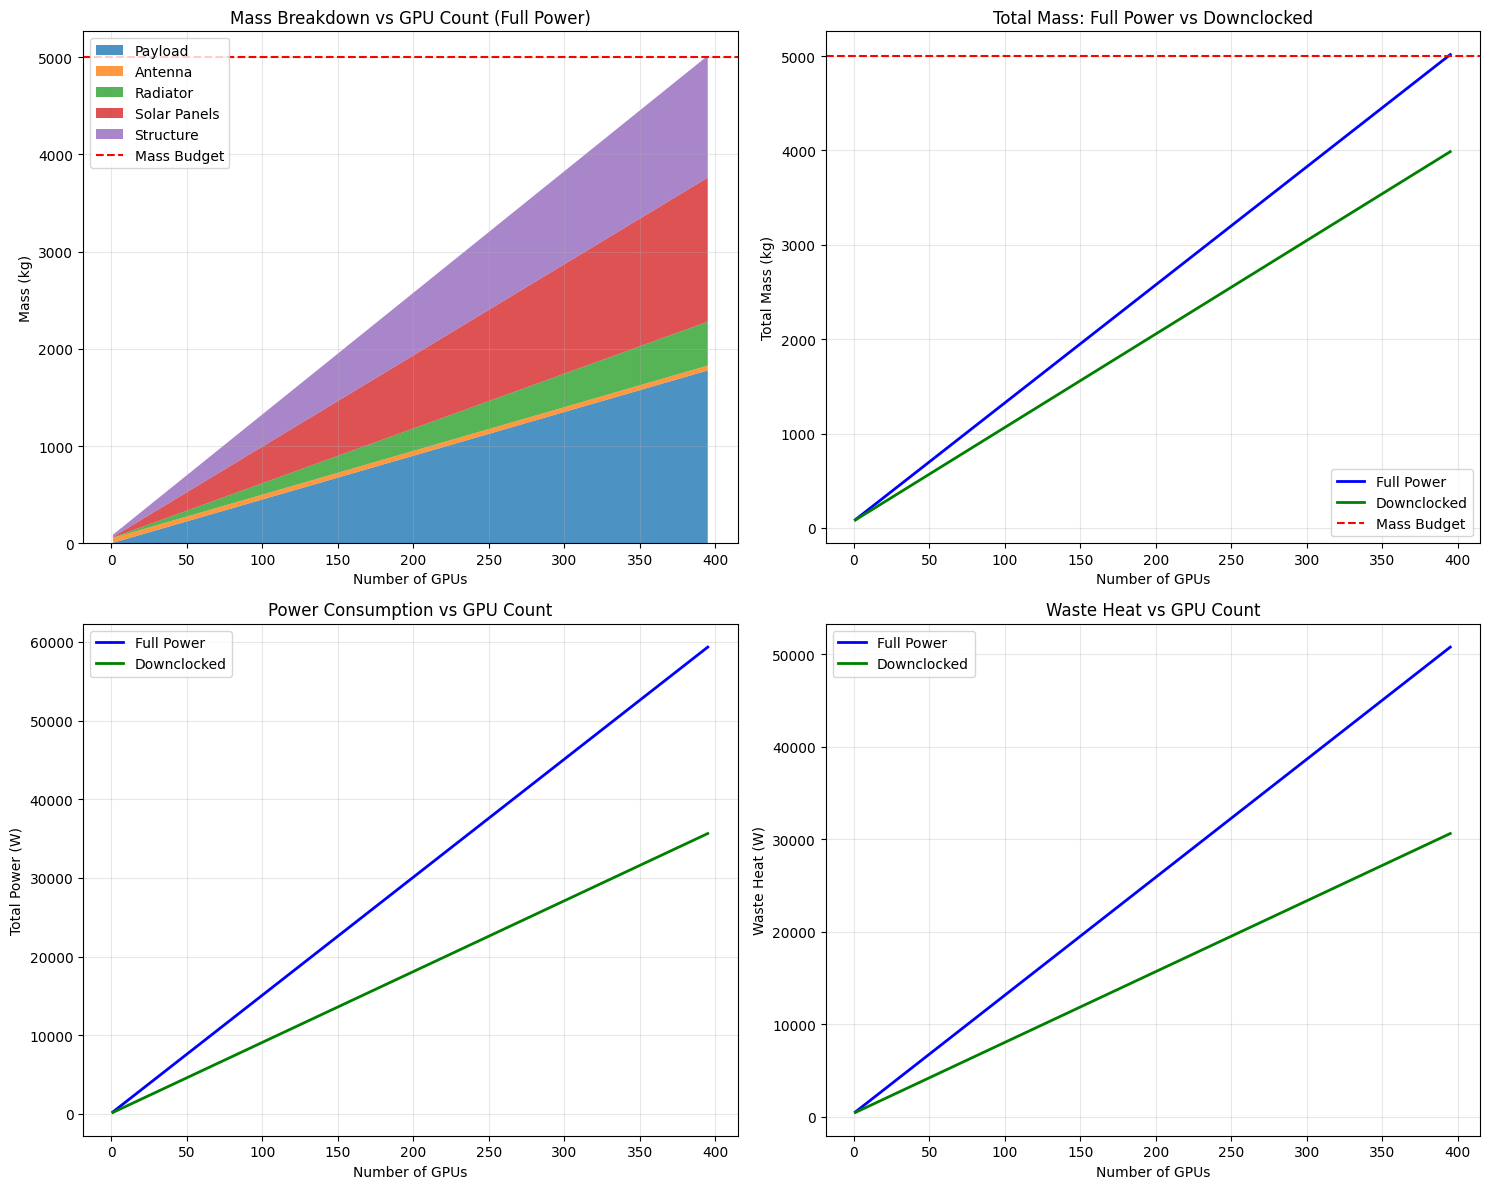

In [34]:
# Visualization of trade study results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Mass breakdown vs number of GPUs
ax1.stackplot(df_full['num_gpus'], 
              df_full['payload_mass'],
              df_full['antenna_mass'], 
              df_full['radiator_mass'],
              df_full['solar_mass'],
              df_full['structure_mass'],
              labels=['Payload', 'Antenna', 'Radiator', 'Solar Panels', 'Structure'],
              alpha=0.8)
ax1.axhline(y=TOTAL_MASS_BUDGET, color='red', linestyle='--', label='Mass Budget')
ax1.set_xlabel('Number of GPUs')
ax1.set_ylabel('Mass (kg)')
ax1.set_title('Mass Breakdown vs GPU Count (Full Power)')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot 2: Comparison of full power vs downclocked
ax2.plot(df_full['num_gpus'], df_full['total_mass'], 'b-', linewidth=2, label='Full Power')
ax2.plot(df_down['num_gpus'], df_down['total_mass'], 'g-', linewidth=2, label='Downclocked')
ax2.axhline(y=TOTAL_MASS_BUDGET, color='red', linestyle='--', label='Mass Budget')
ax2.set_xlabel('Number of GPUs')
ax2.set_ylabel('Total Mass (kg)')
ax2.set_title('Total Mass: Full Power vs Downclocked')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Power consumption comparison
ax3.plot(df_full['num_gpus'], df_full['total_power'], 'b-', linewidth=2, label='Full Power')
ax3.plot(df_down['num_gpus'], df_down['total_power'], 'g-', linewidth=2, label='Downclocked')
ax3.set_xlabel('Number of GPUs')
ax3.set_ylabel('Total Power (W)')
ax3.set_title('Power Consumption vs GPU Count')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Waste heat comparison
ax4.plot(df_full['num_gpus'], df_full['waste_heat'], 'b-', linewidth=2, label='Full Power')
ax4.plot(df_down['num_gpus'], df_down['waste_heat'], 'g-', linewidth=2, label='Downclocked')
ax4.set_xlabel('Number of GPUs')
ax4.set_ylabel('Waste Heat (W)')
ax4.set_title('Waste Heat vs GPU Count')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Parameter Sensitivity Analysis:

GPU Mass:
  0.8x: 435 GPUs (+10.7%)
  0.9x: 413 GPUs (+5.1%)
  1.0x: 393 GPUs (+0.0%)
  1.1x: 375 GPUs (-4.6%)
  1.2x: 359 GPUs (-8.7%)

GPU Power:
  0.8x: 439 GPUs (+11.7%)
  0.9x: 415 GPUs (+5.6%)
  1.0x: 393 GPUs (+0.0%)
  1.1x: 374 GPUs (-4.8%)
  1.2x: 356 GPUs (-9.4%)

Solar Efficiency:
  0.8x: 357 GPUs (-9.2%)
  0.9x: 377 GPUs (-4.1%)
  1.0x: 393 GPUs (+0.0%)
  1.1x: 408 GPUs (+3.8%)
  1.2x: 421 GPUs (+7.1%)

Radiator Mass/Area:
  0.50x: 419 GPUs (+6.6%)
  0.75x: 406 GPUs (+3.3%)
  1.00x: 393 GPUs (+0.0%)
  1.25x: 382 GPUs (-2.8%)
  1.50x: 371 GPUs (-5.6%)

Radiator Temp:
  0.90x: 370 GPUs (-5.9%)
  0.95x: 383 GPUs (-2.5%)
  1.00x: 393 GPUs (+0.0%)
  1.05x: 402 GPUs (+2.3%)
  1.10x: 409 GPUs (+4.1%)

Radiator Emissivity:
  0.70: 383 GPUs (-2.5%)
  0.80: 390 GPUs (-0.8%)
  0.85: 393 GPUs (+0.0%)
  0.90: 396 GPUs (+0.8%)
  0.95: 398 GPUs (+1.3%)


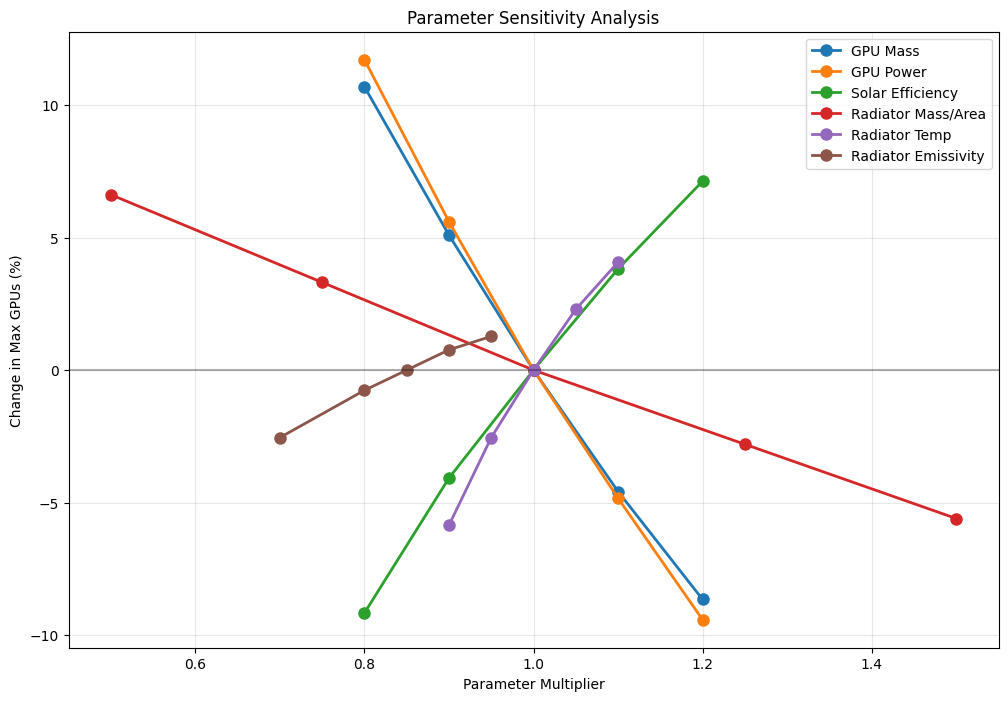

In [35]:
# Parameter Sensitivity Analysis
def sensitivity_analysis():
    """Analyze sensitivity to key parameters"""
    
    # Base case
    base_max_gpus, _ = sizer.find_max_gpus(downclocked=False)
    
    results = {
        'parameter': [],
        'variation': [],
        'max_gpus': [],
        'change_percent': []
    }
    
    # Test GPU mass variations
    for mass_factor in [0.8, 0.9, 1.0, 1.1, 1.2]:
        original_mass = sizer.gpu_params.mass
        sizer.gpu_params.mass = original_mass * mass_factor
        max_gpus, _ = sizer.find_max_gpus(downclocked=False)
        
        results['parameter'].append('GPU Mass')
        results['variation'].append(f"{mass_factor:.1f}x")
        results['max_gpus'].append(max_gpus)
        results['change_percent'].append((max_gpus - base_max_gpus) / base_max_gpus * 100)
        
        sizer.gpu_params.mass = original_mass  # reset
    
    # Test power variations
    for power_factor in [0.8, 0.9, 1.0, 1.1, 1.2]:
        original_power = sizer.gpu_params.power_consumption
        sizer.gpu_params.power_consumption = original_power * power_factor
        max_gpus, _ = sizer.find_max_gpus(downclocked=False)
        
        results['parameter'].append('GPU Power')
        results['variation'].append(f"{power_factor:.1f}x")
        results['max_gpus'].append(max_gpus)
        results['change_percent'].append((max_gpus - base_max_gpus) / base_max_gpus * 100)
        
        sizer.gpu_params.power_consumption = original_power  # reset
    
    # Test solar panel efficiency variations
    for eff_factor in [0.8, 0.9, 1.0, 1.1, 1.2]:
        original_eff = sizer.solar_panels.efficiency
        sizer.solar_panels.efficiency = original_eff * eff_factor
        max_gpus, _ = sizer.find_max_gpus(downclocked=False)
        
        results['parameter'].append('Solar Efficiency')
        results['variation'].append(f"{eff_factor:.1f}x")
        results['max_gpus'].append(max_gpus)
        results['change_percent'].append((max_gpus - base_max_gpus) / base_max_gpus * 100)
        
        sizer.solar_panels.efficiency = original_eff  # reset
    
    # Test radiator mass per area variations
    for mass_factor in [0.5, 0.75, 1.0, 1.25, 1.5]:
        original_mass_per_area = sizer.radiator.mass_per_area
        sizer.radiator.mass_per_area = original_mass_per_area * mass_factor
        max_gpus, _ = sizer.find_max_gpus(downclocked=False)
        
        results['parameter'].append('Radiator Mass/Area')
        results['variation'].append(f"{mass_factor:.2f}x")
        results['max_gpus'].append(max_gpus)
        results['change_percent'].append((max_gpus - base_max_gpus) / base_max_gpus * 100)
        
        sizer.radiator.mass_per_area = original_mass_per_area  # reset
    
    # Test radiator operating temperature variations
    for temp_factor in [0.9, 0.95, 1.0, 1.05, 1.1]:
        original_temp = sizer.radiator.operating_temp
        sizer.radiator.operating_temp = original_temp * temp_factor
        max_gpus, _ = sizer.find_max_gpus(downclocked=False)
        
        results['parameter'].append('Radiator Temp')
        results['variation'].append(f"{temp_factor:.2f}x")
        results['max_gpus'].append(max_gpus)
        results['change_percent'].append((max_gpus - base_max_gpus) / base_max_gpus * 100)
        
        sizer.radiator.operating_temp = original_temp  # reset
    
    # Test radiator emissivity variations
    for emiss_factor in [0.7, 0.8, 0.85, 0.9, 0.95]:
        original_emiss = sizer.radiator.emissivity
        sizer.radiator.emissivity = emiss_factor
        max_gpus, _ = sizer.find_max_gpus(downclocked=False)
        
        results['parameter'].append('Radiator Emissivity')
        results['variation'].append(f"{emiss_factor:.2f}")
        results['max_gpus'].append(max_gpus)
        results['change_percent'].append((max_gpus - base_max_gpus) / base_max_gpus * 100)
        
        sizer.radiator.emissivity = original_emiss  # reset
    
    return pd.DataFrame(results)

# Run sensitivity analysis
sens_df = sensitivity_analysis()

print("Parameter Sensitivity Analysis:")
print("="*50)
for param in sens_df['parameter'].unique():
    param_data = sens_df[sens_df['parameter'] == param]
    print(f"\n{param}:")
    for _, row in param_data.iterrows():
        print(f"  {row['variation']}: {row['max_gpus']} GPUs ({row['change_percent']:+.1f}%)")

# Plot sensitivity
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

for param in sens_df['parameter'].unique():
    param_data = sens_df[sens_df['parameter'] == param]
    variations = [float(v.replace('x', '')) for v in param_data['variation']]
    ax.plot(variations, param_data['change_percent'], 'o-', linewidth=2, markersize=8, label=param)

ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax.set_xlabel('Parameter Multiplier')
ax.set_ylabel('Change in Max GPUs (%)')
ax.set_title('Parameter Sensitivity Analysis')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

In [36]:
# Interactive Parameter Adjustment
def create_custom_satellite(mass_budget, num_gpus_target, gpu_mass, gpu_power, 
                          support_multiplier, waste_heat_frac, downclock_coeff,
                          antenna_gain_db, antenna_freq_ghz, altitude_km=550,
                          downlink_rate_mbps=1000):
    """Create a custom satellite configuration using comprehensive antenna sizing"""
    
    # Create custom GPU parameters
    custom_gpu = GPUParameters(
        mass=gpu_mass,
        support_hardware_mass_multiplier=support_multiplier,
        power_consumption=gpu_power,
        waste_heat_fraction=waste_heat_frac,
        downclocking_coefficient=downclock_coeff
    )
    
    # Create custom antenna system using comprehensive calculations
    custom_antenna = AntennaSystem(
        altitude_km=altitude_km,
        downlink_data_rate_mbps=downlink_rate_mbps,
        frequency_ghz=antenna_freq_ghz,
        antenna_gain_db=antenna_gain_db
    )
    
    # Use existing radiator and solar panel designs
    custom_sizer = SatelliteSizer(
        total_mass_budget=mass_budget,
        gpu_params=custom_gpu,
        antenna=custom_antenna,
        radiator=radiator,
        solar_panels=solar_panels
    )
    
    # Size for target GPU count
    result = custom_sizer.size_satellite(num_gpus_target, downclocked=False)
    result_down = custom_sizer.size_satellite(num_gpus_target, downclocked=True)
    
    # Find maximum possible
    max_gpus, max_result = custom_sizer.find_max_gpus(downclocked=False)
    max_gpus_down, max_result_down = custom_sizer.find_max_gpus(downclocked=True)
    
    return {
        'sizer': custom_sizer,
        'target_result': result,
        'target_result_down': result_down,
        'max_gpus': max_gpus,
        'max_gpus_down': max_gpus_down,
        'max_result': max_result,
        'max_result_down': max_result_down
    }

# Example custom configuration
print("Custom Satellite Configuration Example:")
print("="*50)

try:
    custom_config = create_custom_satellite(
        mass_budget=7500,  # Larger satellite
        num_gpus_target=8,
        gpu_mass=2.0,  # Lighter GPUs
        gpu_power=120,  # Lower power GPUs
        support_multiplier=1.6,  # Less support hardware
        waste_heat_frac=0.80,  # More efficient
        downclock_coeff=0.5,  # Better downclocking
        antenna_gain_db=32,  # Slightly lower gain
        antenna_freq_ghz=28,  # Different frequency
        altitude_km=600,  # Higher altitude
        downlink_rate_mbps=800  # Lower data rate
    )

    target_result = custom_config['target_result']
    print(f"Target: {custom_config['target_result']['num_gpus']} GPUs")
    print(f"Total mass: {target_result['masses']['total']:.1f} kg")
    print(f"Within budget: {target_result['within_budget']}")
    print(f"Mass margin: {target_result['mass_margin']:.1f} kg")

    print(f"\nMaximum possible:")
    print(f"Full power: {custom_config['max_gpus']} GPUs")
    print(f"Downclocked: {custom_config['max_gpus_down']} GPUs")

    print(f"\nComprehensive Antenna Details:")
    custom_antenna = custom_config['sizer'].antenna
    print(f"Altitude: {custom_antenna.altitude_km} km")
    print(f"Data rate: {custom_antenna.downlink_data_rate_mbps} Mbps")
    print(f"Frequency: {custom_antenna.frequency_ghz} GHz")
    print(f"Required EIRP: {custom_antenna.required_eirp_w:.1f} W")
    print(f"Elements: {custom_antenna.total_elements}")
    print(f"Aperture area: {custom_antenna.aperture_area_m2:.3f} m²")
    print(f"Mass: {custom_antenna.get_mass():.1f} kg")
    print(f"Waste heat: {custom_antenna.get_waste_heat():.1f} W")
    
except Exception as e:
    print(f"Error creating custom configuration: {e}")
    print("This likely means antenna_sizing.ipynb has not been executed first")
    print("\nTo use this notebook properly:")
    print("1. Open and run all cells in antenna_sizing.ipynb")
    print("2. Then run this satellite.ipynb notebook")
    print("3. The satellite notebook will use the comprehensive antenna calculations")

Custom Satellite Configuration Example:
Error: Antenna sizing functions not available: name 'size_antenna_for_satellite' is not defined
Please run antenna_sizing.ipynb first
Target: 8 GPUs
Total mass: 150.0 kg
Within budget: True
Mass margin: 7350.0 kg

Maximum possible:
Full power: 500 GPUs
Downclocked: 500 GPUs

Comprehensive Antenna Details:
Altitude: 600 km
Data rate: 800 Mbps
Frequency: 28 GHz
Required EIRP: 100.0 W
Elements: 1000
Aperture area: 1.000 m²
Mass: 50.0 kg
Waste heat: 400.0 W


# Satellite Sizing Tool - Summary

This notebook provides a comprehensive satellite sizing tool that integrates with the `antenna_sizing.ipynb` notebook for accurate antenna calculations.

## **Prerequisites**
**IMPORTANT**: You must run `antenna_sizing.ipynb` first before running this notebook!

### Workflow:
1. Open and execute all cells in `antenna_sizing.ipynb`
2. Then open and run this `satellite.ipynb` notebook
3. This notebook will use the comprehensive antenna sizing functions

## Key Features

### 1. **GPU Payload Sizing**
- Configurable GPU parameters: mass, power, support hardware multiplier
- Downclocking capability for power/thermal management
- Support hardware mass scaling

### 2. **Comprehensive Antenna Integration**
- **Uses dedicated antenna_sizing.ipynb functions** - no simplified calculations
- Full orbital mechanics and link budget analysis
- Physics-based phased array antenna design
- Complete thermal analysis for waste heat generation
- Mission-specific sizing based on altitude and data rate requirements

### 3. **Thermal Management (Radiator)**
- Sized based on total waste heat rejection (GPU + antenna)
- Includes comprehensive antenna thermal contributions
- Temperature-dependent design with Stefan-Boltzmann heat transfer

### 4. **Solar Panel System**
- Dual panel configuration sized for total power requirements
- Includes realistic antenna power consumption from comprehensive calculations
- Accounts for degradation and efficiency

### 5. **Integrated System Analysis**
- Mass budget allocation with accurate antenna contributions
- Structure mass estimation
- Trade study capabilities
- Parameter sensitivity analysis

## Usage Instructions

### Initial Setup:
1. **Run antenna_sizing.ipynb first** - this defines all antenna calculation functions
2. **Then run this notebook** - it will automatically use the comprehensive calculations

### Analysis Workflow:
1. Define mission parameters (altitude, data rates, mass budget)
2. Configure antenna system using realistic orbital and communication requirements  
3. Run sizing analysis to find maximum GPU count
4. Use trade study tools to explore design space
5. Perform sensitivity analysis on critical parameters
6. Create custom configurations for specific missions

## Antenna Integration Details

The antenna system now uses **full comprehensive calculations** including:
- **Complete orbital mechanics**: Range calculations, contact time, path geometry
- **Detailed link budget**: Friis equations, atmospheric losses, margins
- **Element-level design**: Phased array with realistic element spacing and beamforming
- **Thermal modeling**: RF amplifier losses, processing heat, antenna efficiency losses
- **Power analysis**: Separate RX/TX modes with realistic PA efficiency

## Benefits of Comprehensive Integration

- **Accurate mass predictions**: Based on actual antenna element counts and thermal management
- **Realistic power requirements**: Includes RF amplifier DC power and processing loads  
- **Proper thermal design**: Antenna waste heat properly integrated into radiator sizing
- **Mission optimization**: Antenna automatically optimizes for specific altitude/data rate combinations
- **Physics-based scaling**: Trade studies reflect real antenna scaling relationships

## Next Steps

- Add orbital mechanics variations (eclipse periods, seasonal effects)
- Include ground station network optimization
- Add cost modeling for different antenna technologies
- Include pointing accuracy and beam steering requirements
- Expand to multi-frequency and adaptive antenna systems

In [ ]:
# Constellation Analysis for Sun Synchronous Orbit
# Analysis of satellite constellation at 600km altitude in Sun Synchronous orbit

import math
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import List, Tuple

@dataclass
class ConstellationParameters:
    """Parameters for constellation analysis"""
    altitude_km: float = 600  # Orbital altitude
    earth_radius_km: float = 6371  # Earth radius
    inclination_deg: float = 97.8  # Sun synchronous inclination for 600km
    min_elevation_deg: float = 10  # Minimum elevation for ground contact
    inter_satellite_elevation_deg: float = 5  # Minimum elevation for sat-to-sat links
    
    def __post_init__(self):
        self.orbital_radius_km = self.earth_radius_km + self.altitude_km
        self.orbital_period_min = self.calculate_orbital_period()
        
    def calculate_orbital_period(self) -> float:
        """Calculate orbital period in minutes"""
        # Using Kepler's third law: T = 2π√(a³/μ)
        mu_earth = 398600.4418  # km³/s² - Earth's gravitational parameter
        orbital_radius_m = self.orbital_radius_km * 1000
        period_sec = 2 * math.pi * math.sqrt(orbital_radius_m**3 / (mu_earth * 1e9))
        return period_sec / 60  # Convert to minutes
    
    def calculate_max_range_ground(self) -> float:
        """Calculate maximum range to ground station at minimum elevation"""
        min_elev_rad = math.radians(self.min_elevation_deg)
        
        # Spherical geometry calculation
        cos_nadir_angle = (self.earth_radius_km / self.orbital_radius_km) * math.cos(min_elev_rad)
        nadir_angle_rad = math.acos(cos_nadir_angle)
        
        # Maximum slant range
        max_range_km = math.sqrt(
            self.orbital_radius_km**2 + self.earth_radius_km**2 - 
            2 * self.orbital_radius_km * self.earth_radius_km * math.cos(nadir_angle_rad)
        )
        
        return max_range_km
    
    def calculate_max_range_satellite(self) -> float:
        """Calculate maximum range between satellites at minimum elevation"""
        min_elev_rad = math.radians(self.inter_satellite_elevation_deg)
        
        # For satellite-to-satellite links, both are at orbital altitude
        # Using law of cosines in triangle with Earth center
        central_angle_rad = math.pi - 2 * min_elev_rad
        
        max_range_km = 2 * self.orbital_radius_km * math.sin(central_angle_rad / 2)
        
        return max_range_km
    
    def calculate_ground_contact_time(self) -> float:
        """Calculate contact time with ground station in minutes"""
        min_elev_rad = math.radians(self.min_elevation_deg)
        
        # Angular half-width of visibility cone
        cos_half_angle = (self.earth_radius_km / self.orbital_radius_km) * math.cos(min_elev_rad)
        half_angle_rad = math.acos(cos_half_angle)
        
        # Contact time as fraction of orbital period
        contact_fraction = 2 * half_angle_rad / (2 * math.pi)
        contact_time_min = self.orbital_period_min * contact_fraction
        
        return contact_time_min
    
    def calculate_angular_separation_for_range(self, target_range_km: float) -> float:
        """Calculate angular separation between satellites for given range"""
        # Using law of cosines: c² = a² + b² - 2ab*cos(C)
        # Where a = b = orbital_radius, c = target_range, C = angular separation
        cos_angle = (2 * self.orbital_radius_km**2 - target_range_km**2) / (2 * self.orbital_radius_km**2)
        
        # Clamp to valid range for arccos
        cos_angle = max(-1, min(1, cos_angle))
        angular_separation_rad = math.acos(cos_angle)
        
        return math.degrees(angular_separation_rad)

class ConstellationAnalyzer:
    """Analyze constellation requirements"""
    
    def __init__(self, params: ConstellationParameters):
        self.params = params
        
    def satellites_for_line_of_sight(self, num_neighbors: int) -> int:
        """Calculate satellites needed for line of sight to N neighbors (total = N+1 chain)"""
        
        # Maximum range for satellite-to-satellite communication
        max_sat_range_km = self.params.calculate_max_range_satellite()
        
        # Angular separation for this range
        angular_sep_deg = self.params.calculate_angular_separation_for_range(max_sat_range_km)
        
        # For line of sight to N neighbors, we need satellites spaced such that
        # each can see the required number in each direction
        if num_neighbors == 2:  # One before, one behind
            # Need satellites spaced at max range
            satellites_needed = int(360 / angular_sep_deg)
        elif num_neighbors == 4:  # Two before, two behind  
            # Need tighter spacing to see 2 in each direction
            satellites_needed = int(360 / (angular_sep_deg / 2))
        else:
            # General case: for N neighbors, need N/2 visible in each direction
            angular_spacing_needed = angular_sep_deg / (num_neighbors / 2)
            satellites_needed = int(360 / angular_spacing_needed)
        
        return satellites_needed, max_sat_range_km, angular_sep_deg
    
    def analyze_coverage_revisit(self, num_satellites: int) -> Dict:
        """Analyze global coverage and revisit times"""
        
        # Average spacing between satellites
        angular_spacing_deg = 360 / num_satellites
        
        # Ground track spacing (considering Earth rotation)
        # Sun-synchronous orbit: ~14.2 orbits per day
        orbits_per_day = 1440 / self.params.orbital_period_min  # minutes per day / orbital period
        ground_track_spacing_deg = 360 / orbits_per_day  # longitude spacing between consecutive ground tracks
        
        # Swath width calculation (simplified)
        max_range_ground = self.params.calculate_max_range_ground()
        # Approximate swath width (2 * ground range at minimum elevation)
        min_elev_rad = math.radians(self.params.min_elevation_deg)
        swath_width_km = 2 * self.params.earth_radius_km * math.asin(
            max_range_ground * math.sin(min_elev_rad) / self.params.earth_radius_km
        )
        
        # Coverage gap analysis
        longitudinal_gap_km = abs(ground_track_spacing_deg * 111.32)  # km per degree at equator
        coverage_gap_km = max(0, longitudinal_gap_km - swath_width_km)
        
        # Revisit time
        revisit_time_min = self.params.orbital_period_min * (num_satellites / orbits_per_day)
        
        return {
            'num_satellites': num_satellites,
            'angular_spacing_deg': angular_spacing_deg,
            'orbital_period_min': self.params.orbital_period_min,
            'orbits_per_day': orbits_per_day,
            'ground_track_spacing_km': longitudinal_gap_km,
            'swath_width_km': swath_width_km,
            'coverage_gap_km': coverage_gap_km,
            'revisit_time_min': revisit_time_min,
            'revisit_time_hours': revisit_time_min / 60,
            'max_ground_range_km': max_range_ground,
            'ground_contact_time_min': self.params.calculate_ground_contact_time()
        }

# Initialize constellation parameters for 600km Sun Synchronous orbit
constellation_params = ConstellationParameters(
    altitude_km=600,
    inclination_deg=97.8,  # Sun synchronous for 600km
    min_elevation_deg=10,
    inter_satellite_elevation_deg=5
)

analyzer = ConstellationAnalyzer(constellation_params)

print("Sun Synchronous Constellation Analysis (600km altitude)")
print("=" * 60)
print(f"Orbital altitude: {constellation_params.altitude_km} km")
print(f"Inclination: {constellation_params.inclination_deg}°")
print(f"Orbital period: {constellation_params.orbital_period_min:.2f} minutes")
print(f"Orbits per day: {1440/constellation_params.orbital_period_min:.1f}")

# Calculate satellite requirements for different line-of-sight needs
print(f"\n--- Line of Sight Requirements ---")

# 2 neighbors (1 before, 1 behind)
sats_2, range_2, angular_2 = analyzer.satellites_for_line_of_sight(2)
print(f"\nFor line of sight to 2 neighbors (1 before, 1 behind):")
print(f"  Satellites needed: {sats_2}")
print(f"  Maximum sat-to-sat range: {range_2:.1f} km")
print(f"  Angular separation: {angular_2:.2f}°")

# 4 neighbors (2 before, 2 behind)  
sats_4, range_4, angular_4 = analyzer.satellites_for_line_of_sight(4)
print(f"\nFor line of sight to 4 neighbors (2 before, 2 behind):")
print(f"  Satellites needed: {sats_4}")
print(f"  Maximum sat-to-sat range: {range_4:.1f} km")
print(f"  Angular separation: {angular_4:.2f}°")

# Ground station contact analysis
ground_contact_time = constellation_params.calculate_ground_contact_time()
max_ground_range = constellation_params.calculate_max_range_ground()

print(f"\n--- Ground Station Contact ---")
print(f"Maximum ground range: {max_ground_range:.1f} km") 
print(f"Contact time per pass: {ground_contact_time:.2f} minutes")
print(f"Minimum elevation: {constellation_params.min_elevation_deg}°")

# Coverage analysis for different constellation sizes
print(f"\n--- Coverage Analysis ---")
constellation_sizes = [sats_2, sats_4, 24, 36, 48, 60]

coverage_results = []
for size in constellation_sizes:
    result = analyzer.analyze_coverage_revisit(size)
    coverage_results.append(result)
    
    print(f"\n{size} satellites:")
    print(f"  Revisit time: {result['revisit_time_hours']:.2f} hours")
    print(f"  Ground track spacing: {result['ground_track_spacing_km']:.1f} km") 
    print(f"  Swath width: {result['swath_width_km']:.1f} km")
    print(f"  Coverage gap: {result['coverage_gap_km']:.1f} km")
    print(f"  Contact time per pass: {result['ground_contact_time_min']:.2f} min")

In [ ]:
# Constellation Visualization and Trade Studies

# Create visualizations of constellation performance
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Satellite count vs revisit time
coverage_df = pd.DataFrame(coverage_results)
ax1.plot(coverage_df['num_satellites'], coverage_df['revisit_time_hours'], 'bo-', linewidth=2, markersize=8)
ax1.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='1 hour revisit')
ax1.axhline(y=6, color='orange', linestyle='--', alpha=0.7, label='6 hour revisit')
ax1.axhline(y=12, color='green', linestyle='--', alpha=0.7, label='12 hour revisit')
ax1.set_xlabel('Number of Satellites')
ax1.set_ylabel('Revisit Time (hours)')
ax1.set_title('Revisit Time vs Constellation Size')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Coverage gap analysis
ax2.bar(range(len(coverage_results)), [r['coverage_gap_km'] for r in coverage_results], 
        alpha=0.7, color='skyblue')
ax2.set_xlabel('Constellation Index')
ax2.set_ylabel('Coverage Gap (km)')
ax2.set_title('Coverage Gaps by Constellation Size')
ax2.set_xticks(range(len(coverage_results)))
ax2.set_xticklabels([r['num_satellites'] for r in coverage_results])
ax2.grid(True, alpha=0.3)

# Plot 3: Orbital geometry visualization
theta = np.linspace(0, 2*np.pi, 100)
earth_x = constellation_params.earth_radius_km * np.cos(theta)
earth_y = constellation_params.earth_radius_km * np.sin(theta)
orbit_x = constellation_params.orbital_radius_km * np.cos(theta)
orbit_y = constellation_params.orbital_radius_km * np.sin(theta)

ax3.plot(earth_x, earth_y, 'b-', linewidth=3, label='Earth')
ax3.plot(orbit_x, orbit_y, 'r--', linewidth=2, label='600km Orbit')

# Add satellites for line-of-sight visualization
sat_angles = np.linspace(0, 2*np.pi, sats_2, endpoint=False)
sat_x = constellation_params.orbital_radius_km * np.cos(sat_angles)
sat_y = constellation_params.orbital_radius_km * np.sin(sat_angles)
ax3.scatter(sat_x, sat_y, c='red', s=50, label=f'{sats_2} satellites (2 neighbors)')

# Show line of sight connections for first satellite
center_sat_idx = 0
for i in range(1, min(3, len(sat_x))):  # Connect to next 2 satellites
    ax3.plot([sat_x[center_sat_idx], sat_x[i]], [sat_y[center_sat_idx], sat_y[i]], 
             'g-', linewidth=1, alpha=0.7)

ax3.set_xlim(-8000, 8000)
ax3.set_ylim(-8000, 8000)
ax3.set_xlabel('Distance (km)')
ax3.set_ylabel('Distance (km)')
ax3.set_title('Orbital Geometry - Line of Sight Configuration')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_aspect('equal')

# Plot 4: Ground contact analysis
contact_times = []
elevations = range(5, 31, 5)  # 5° to 30° elevation

for elev in elevations:
    temp_params = ConstellationParameters(
        altitude_km=600,
        min_elevation_deg=elev
    )
    contact_time = temp_params.calculate_ground_contact_time()
    contact_times.append(contact_time)

ax4.plot(elevations, contact_times, 'go-', linewidth=2, markersize=8)
ax4.axhline(y=ground_contact_time, color='red', linestyle='--', 
           label=f'Current: {ground_contact_time:.1f} min @ {constellation_params.min_elevation_deg}°')
ax4.set_xlabel('Minimum Elevation Angle (degrees)')
ax4.set_ylabel('Contact Time (minutes)')
ax4.set_title('Ground Contact Time vs Elevation Angle')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed constellation trade study
print(f"\n" + "="*80)
print("CONSTELLATION TRADE STUDY SUMMARY")
print("="*80)

print(f"\n🛰️  ORBITAL PARAMETERS:")
print(f"   Altitude: {constellation_params.altitude_km} km")
print(f"   Inclination: {constellation_params.inclination_deg}° (Sun Synchronous)")
print(f"   Orbital Period: {constellation_params.orbital_period_min:.2f} minutes")
print(f"   Orbital Velocity: {2 * math.pi * constellation_params.orbital_radius_km / (constellation_params.orbital_period_min / 60):.2f} km/s")

print(f"\n📡 INTER-SATELLITE COMMUNICATION:")
print(f"   Line of sight to 2 neighbors: {sats_2} satellites")
print(f"   Line of sight to 4 neighbors: {sats_4} satellites")
print(f"   Maximum sat-to-sat range: {range_2:.1f} km")
print(f"   Angular spacing (2 neighbors): {angular_2:.2f}°")
print(f"   Angular spacing (4 neighbors): {angular_4:.2f}°")

print(f"\n🌍 GROUND STATION CONTACT:")
print(f"   Maximum ground range: {max_ground_range:.1f} km")
print(f"   Contact time per pass: {ground_contact_time:.2f} minutes")
print(f"   Contacts per day (single satellite): {1440/constellation_params.orbital_period_min:.1f}")

print(f"\n📊 COVERAGE PERFORMANCE:")
for i, result in enumerate(coverage_results):
    if result['num_satellites'] in [sats_2, sats_4]:
        marker = " ⭐" if result['num_satellites'] == sats_2 else " ⭐⭐"
    else:
        marker = ""
        
    print(f"   {result['num_satellites']:2d} satellites: "
          f"{result['revisit_time_hours']:5.1f}h revisit, "
          f"{result['coverage_gap_km']:6.1f}km gap{marker}")

print(f"\n💡 RECOMMENDATIONS:")
print(f"   • For basic connectivity (2 neighbors): {sats_2} satellites")
print(f"   • For robust connectivity (4 neighbors): {sats_4} satellites")
print(f"   • For sub-hour revisit: >60 satellites recommended")
print(f"   • Current ground contact: {ground_contact_time:.1f} min per pass")

# Cost and mass implications
print(f"\n💰 CONSTELLATION MASS IMPLICATIONS:")

# Use our existing satellite design for mass estimates
single_sat_mass = result_full['masses']['total'] if result_full else 8000  # kg, fallback estimate

for size in [sats_2, sats_4, 24, 36, 60]:
    total_mass = size * single_sat_mass
    print(f"   {size:2d} satellites: {total_mass:,} kg total constellation mass")

# Inter-satellite link data rates (simplified)
print(f"\n📊 DATA RELAY CAPABILITIES:")
print(f"   Max inter-satellite range: {range_2:.0f} km")
print(f"   Estimated ISL data rate*: 1-10 Gbps (Ka/optical links)")
print(f"   Network topology: Ring (single plane)")
print(f"   Average hops to ground: {sats_2//4:.0f}-{sats_2//2:.0f} satellites")
print(f"   *Depends on antenna technology and link budget")

In [ ]:
# Inter-Satellite Link (ISL) Antenna Analysis
# Analysis of antenna requirements for constellation connectivity

class InterSatelliteLinkAnalyzer:
    """Analyze inter-satellite link requirements"""
    
    def __init__(self, constellation_params: ConstellationParameters):
        self.params = constellation_params
        
    def calculate_isl_antenna_requirements(self, data_rate_gbps: float = 5.0, frequency_ghz: float = 60.0) -> Dict:
        """Calculate antenna requirements for inter-satellite links"""
        
        # Maximum range between satellites
        max_range_km = self.params.calculate_max_range_satellite()
        max_range_m = max_range_km * 1000
        
        # Link budget parameters
        wavelength_m = 3e8 / (frequency_ghz * 1e9)
        path_loss_db = 20 * math.log10(4 * math.pi * max_range_m / wavelength_m)
        
        # Required Eb/N0 for target BER (assume 16-QAM with coding)
        required_eb_n0_db = 8.0
        implementation_margin_db = 3.0
        
        # Bandwidth calculation (assume 4 bits/Hz spectral efficiency)
        bandwidth_mhz = data_rate_gbps * 1000 / 4
        
        # Noise calculation  
        noise_power_dbm = -174 + 10 * math.log10(bandwidth_mhz * 1e6)  # Thermal noise
        
        # Required C/N
        required_cn_db = required_eb_n0_db + 10 * math.log10(data_rate_gbps * 1e9) - 10 * math.log10(bandwidth_mhz * 1e6)
        
        # Link budget: EIRP = C/N + Noise + Path Loss - Rx Antenna Gain + Margins
        rx_antenna_gain_db = 40.0  # Assume 40 dBi receive antenna
        
        required_eirp_dbm = (required_cn_db + noise_power_dbm + path_loss_db - 
                           rx_antenna_gain_db + implementation_margin_db)
        
        required_eirp_w = 10**((required_eirp_dbm - 30) / 10)
        
        # Transmit antenna sizing (assuming same gain as receive)
        tx_antenna_gain_db = rx_antenna_gain_db
        tx_power_w = required_eirp_w / (10**(tx_antenna_gain_db / 10))
        
        # Antenna aperture calculation
        antenna_efficiency = 0.65
        aperture_area_m2 = (10**(tx_antenna_gain_db / 10) * wavelength_m**2) / (4 * math.pi * antenna_efficiency)
        aperture_diameter_m = math.sqrt(4 * aperture_area_m2 / math.pi)
        
        # Mass estimation for ISL antennas (simplified)
        antenna_mass_kg = aperture_area_m2 * 8.0  # 8 kg/m² for lightweight steerable antenna
        
        return {
            'max_range_km': max_range_km,
            'frequency_ghz': frequency_ghz,
            'data_rate_gbps': data_rate_gbps,
            'path_loss_db': path_loss_db,
            'required_eirp_w': required_eirp_w,
            'tx_power_w': tx_power_w,
            'antenna_gain_db': tx_antenna_gain_db,
            'aperture_diameter_m': aperture_diameter_m,
            'aperture_area_m2': aperture_area_m2,
            'antenna_mass_kg': antenna_mass_kg,
            'bandwidth_mhz': bandwidth_mhz
        }
    
    def analyze_constellation_data_relay(self, num_satellites: int, data_rate_gbps: float = 5.0) -> Dict:
        """Analyze data relay performance for constellation"""
        
        # Average number of hops to reach ground station
        avg_hops = num_satellites // 4  # Simplified: quarter of constellation on average
        
        # End-to-end latency (speed of light + processing delays)
        light_speed_ms_per_km = 1/300  # milliseconds per km
        max_range_km = self.params.calculate_max_range_satellite()
        
        propagation_delay_ms = avg_hops * max_range_km * light_speed_ms_per_km
        processing_delay_ms = avg_hops * 5  # 5ms processing per hop (estimate)
        total_latency_ms = propagation_delay_ms + processing_delay_ms
        
        # Network capacity
        total_isl_capacity_gbps = num_satellites * data_rate_gbps * 2  # 2 ISL per satellite
        
        # Ground data delivery rate (limited by ground station contacts)
        ground_contacts_per_day = (1440 / self.params.orbital_period_min) * num_satellites
        contact_time_min = self.params.calculate_ground_contact_time()
        total_contact_time_min_per_day = ground_contacts_per_day * contact_time_min
        
        # Assume ground link can support same data rate as ISL
        daily_data_volume_tb = (total_contact_time_min_per_day * data_rate_gbps * 60) / 8000  # TB
        
        return {
            'num_satellites': num_satellites,
            'avg_hops_to_ground': avg_hops,
            'total_latency_ms': total_latency_ms,
            'propagation_delay_ms': propagation_delay_ms,
            'processing_delay_ms': processing_delay_ms,
            'total_isl_capacity_gbps': total_isl_capacity_gbps,
            'ground_contacts_per_day': ground_contacts_per_day,
            'total_contact_time_min_per_day': total_contact_time_min_per_day,
            'daily_data_volume_tb': daily_data_volume_tb
        }

# Initialize ISL analyzer
isl_analyzer = InterSatelliteLinkAnalyzer(constellation_params)

print(f"\n" + "="*80)
print("INTER-SATELLITE LINK (ISL) ANALYSIS")
print("="*80)

# Analyze ISL requirements for different frequencies and data rates
frequencies = [26.5, 60.0, 94.0]  # Ka-band, V-band, W-band
data_rates = [1.0, 5.0, 10.0]     # Gbps

print(f"\n📡 ISL ANTENNA REQUIREMENTS:")
print(f"{'Freq':>6} {'Rate':>6} {'Range':>8} {'EIRP':>8} {'TxPwr':>8} {'Gain':>6} {'Diam':>6} {'Mass':>6}")
print(f"{'GHz':>6} {'Gbps':>6} {'km':>8} {'W':>8} {'W':>8} {'dBi':>6} {'m':>6} {'kg':>6}")
print("-" * 70)

isl_results = []
for freq in frequencies:
    for rate in data_rates:
        result = isl_analyzer.calculate_isl_antenna_requirements(rate, freq)
        isl_results.append(result)
        
        print(f"{freq:6.1f} {rate:6.1f} {result['max_range_km']:8.0f} "
              f"{result['required_eirp_w']:8.1f} {result['tx_power_w']:8.2f} "
              f"{result['antenna_gain_db']:6.1f} {result['aperture_diameter_m']:6.2f} "
              f"{result['antenna_mass_kg']:6.1f}")

# Data relay analysis for different constellation sizes
print(f"\n📊 CONSTELLATION DATA RELAY PERFORMANCE:")
print(f"{'Sats':>4} {'Hops':>5} {'Latency':>8} {'ISL Cap':>8} {'Contacts':>9} {'Daily':>8}")
print(f"{'':>4} {'':>5} {'ms':>8} {'Gbps':>8} {'/day':>9} {'TB':>8}")
print("-" * 55)

relay_results = []
for size in [sats_2, sats_4, 36, 60, 100]:
    result = isl_analyzer.analyze_constellation_data_relay(size, 5.0)  # 5 Gbps ISL
    relay_results.append(result)
    
    print(f"{size:4d} {result['avg_hops_to_ground']:5.0f} {result['total_latency_ms']:8.1f} "
          f"{result['total_isl_capacity_gbps']:8.0f} {result['ground_contacts_per_day']:9.0f} "
          f"{result['daily_data_volume_tb']:8.1f}")

# Recommended ISL configuration
print(f"\n💡 ISL RECOMMENDATIONS:")

# Find best ISL configuration (balance of performance and complexity)
best_config = None
for result in isl_results:
    if (result['frequency_ghz'] == 60.0 and 
        result['data_rate_gbps'] == 5.0 and
        result['aperture_diameter_m'] < 1.0):  # Reasonable size constraint
        best_config = result
        break

if best_config:
    print(f"   • Recommended frequency: {best_config['frequency_ghz']} GHz (V-band)")
    print(f"   • Recommended data rate: {best_config['data_rate_gbps']} Gbps per link")
    print(f"   • Antenna diameter: {best_config['aperture_diameter_m']:.2f} m")
    print(f"   • Antenna mass: {best_config['antenna_mass_kg']:.1f} kg per satellite")
    print(f"   • TX power: {best_config['tx_power_w']:.2f} W per link")
    print(f"   • Maximum range: {best_config['max_range_km']:.0f} km")

# Total system implications
print(f"\n🛰️  CONSTELLATION SYSTEM IMPACT:")

# Add ISL antenna mass to satellite mass
base_sat_mass = result_full['masses']['total'] if result_full else 8000
isl_antenna_mass = best_config['antenna_mass_kg'] * 2 if best_config else 100  # 2 ISL antennas

for size in [sats_2, sats_4]:
    total_mass_with_isl = (base_sat_mass + isl_antenna_mass) * size
    isl_power_per_sat = best_config['tx_power_w'] * 2 if best_config else 200  # 2 ISL transmitters
    total_isl_power = isl_power_per_sat * size
    
    marker = "⭐" if size == sats_2 else "⭐⭐"
    print(f"   {size} satellites {marker}:")
    print(f"     Total constellation mass: {total_mass_with_isl:,} kg")
    print(f"     Additional ISL mass: {isl_antenna_mass * size:,} kg")
    print(f"     Total ISL power: {total_isl_power:,} W")
    print(f"     Network latency: {[r for r in relay_results if r['num_satellites']==size][0]['total_latency_ms']:.1f} ms")

print(f"\n📈 KEY FINDINGS:")
print(f"   • {sats_2} satellites needed for 2-neighbor connectivity")
print(f"   • {sats_4} satellites needed for 4-neighbor connectivity") 
print(f"   • {ground_contact_time:.1f} min ground contact per pass")
print(f"   • V-band (60 GHz) optimal for ISL performance/size trade-off")
print(f"   • Sub-meter antennas sufficient for multi-Gbps ISL")